# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #00FF00; text-align: center; line-height: 0.55;background-color: #3B3B3C"><b>Credit Card Fraud Detection</b><br></h1>

<center>
    <img src="https://miro.medium.com/v2/resize:fit:750/1*Lci4cCUXgb6zZRyKmgWfVA.png" alt="Credit Card Fraud Detection" width="50%">
</center>

## Problem Statement :

Credit card fraud refers to the unauthorized use of someone else's credit card information for financial transactions, without the knowledge or consent of the card owner. Credit cards were introduced to empower individuals by allowing them to access borrowed funds from a bank, with an agreement to repay the borrowed amount by a due date or incur interest charges. With the rapid growth of e-commerce and the surge in OTT platforms during the Coronavirus Pandemic, the use of credit cards, as well as other payment methods, has significantly increased. Unfortunately, this rise in usage has also led to a substantial increase in credit card fraud cases, which now pose a significant burden on the global economy, costing over $24 billion annually.

Consequently, it has become imperative to address this issue, leading to the emergence of numerous startups within the $30 billion credit card fraud prevention industry. The development of automated models using artificial intelligence (AI) and machine learning (ML) has become essential in tackling this growing problem effectively. By leveraging AI and ML technologies, we can enhance the accuracy and efficiency of fraud detection and prevention, ultimately reducing the financial impact and securing transactions for individuals and businesses alike.

## Aim:
- The task at hand involves categorizing credit card transactions as either fraudulent or genuine, which can be seen as a binary classification problem.
- However, the dataset used for this task is highly imbalanced, with a significant disparity between the number of fraudulent and genuine transactions. Therefore, it becomes crucial to address the challenge of handling an imbalanced dataset while performing this classification task.

## Data Understanding
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

    
- **V1 - V28** : Numerical features that are a result of PCA transformation.

- **Time** : Seconds elapsed between each transaction and the 1st transaction.

- **Amount** : Transaction amount.

- **Class** : Fraud or otherwise (1 or 0)

## Notebook Contents :
- Dataset Information
- Data Visualization
- Feature Selection
- Data Balancing
- Modeling
- Conclusion

### Lets get started!

## Importing Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


## Data Info :

In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- **No null values** present in the data!
- As all the columns except **Class**, **Amount** and **Time** is already transformed, let's explore these three columns

In [6]:
#data.describe()

## Exploratory Data Analysis:

1. Distribution Of Target Variable:

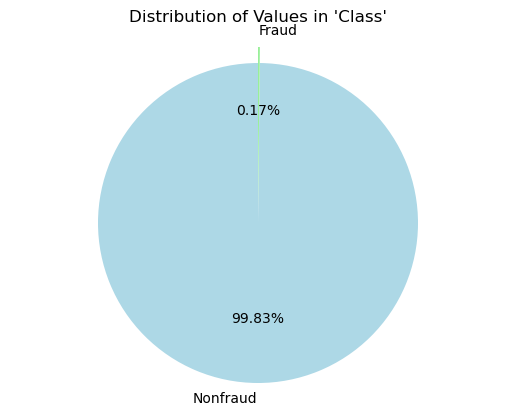

In [7]:
# Calculate the value counts for each unique value in the column
value_counts = data["Class"].value_counts()

# Calculate the percentage of values that are 0 and 1
percentage_Nonfraud = (value_counts[0] / len(data)) * 100
percentage_Fraud = (value_counts[1] / len(data)) * 100

# Create a pie chart to visualize the percentages
labels = ['Nonfraud', 'Fraud']
sizes = [percentage_Nonfraud, percentage_Fraud]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Explode the first slice (0) for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', startangle=90)

# Add a title
plt.title("Distribution of Values in 'Class'")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


- The data is clearly **highly unbalanced** with majority of the transactions being **No Fraud**. 
- Due to highly unbalanced data, the classification model will bias its prediction towards the majority class, **No Fraud**. 
- Hence, data balancing becomes a crucial part in building a robust model. 

2. Distribution Of Time:

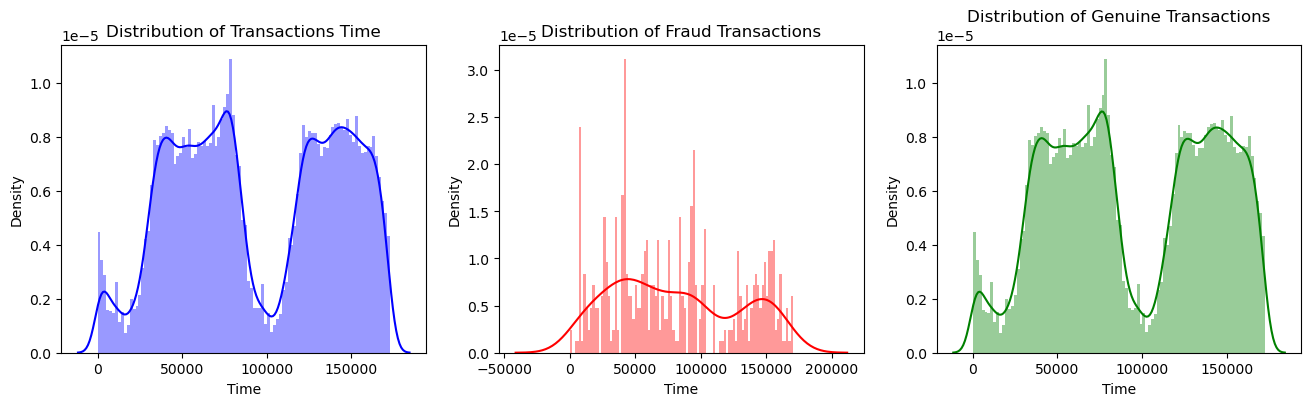

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(16,4))


sns.distplot(data['Time'], bins=100, color = "Blue", ax= axs[0])
axs[0].set_title("Distribution of Transactions Time")

sns.distplot(data[(data['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[1])
axs[1].set_title("Distribution of Fraud Transactions")

sns.distplot(data[(data['Class'] == 0)]['Time'], bins=100, color='green', ax=axs[2])
axs[2].set_title("Distribution of Genuine Transactions")

plt.show()

The graph exhibits two prominent peaks, indicating high activity during the day when most transactions occur, and a notable dip representing the night-time when transaction volume decreases significantly. As the dataset captures credit card transactions over a span of only two days, the presence of two peaks suggests distinct patterns for day-time activity, while the dip represents the night-time period with reduced transactional engagement.

3. Distribution of Transaction Amount

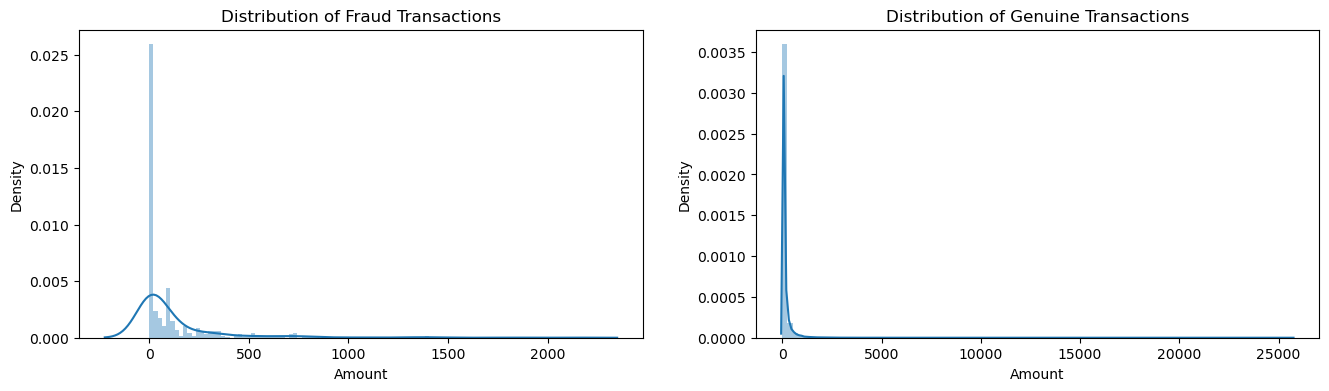

In [9]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(data[data['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(data[data['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

- From above we can conclude that there is no significant pattern in the data.
- However we can see the Amount aatribute is highly skewed

## Feauture Scaling:

- Since **Amount** is highly skewed, we can apply scaling on this attribute.

1. Log Scaling
2. Normalisation
3. Standardization
4. Robust Scaling

As Robust scaling is effective when there is outliers, so let's use this scaling.

In [10]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data['amount_scaled'] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1)).flatten()

## Feature Selection:

- As we have already scaled amount, so we will drop the corresponding column.
- Also as Time has no significance, so we will dropn the column.

In [11]:
X = data.drop(["Time","Amount","Class"],axis=1)
y = data['Class']

## Data Splitting and Resampling:

- As the data is unbalanced, let's split the data before applying sampling techniques.
- **Reason**: To avoid data leakage.

##### Data leakage:
This type of data leakage occurs when information from the test set (or unseen data) is used during the training phase. It can happen when preprocessing steps, such as feature scaling or imputation, are applied to the entire dataset before splitting it into training and test sets. As a result, the model indirectly gains knowledge about the test data, leading to unrealistic performance estimates.

##### Resampling:
- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.

In [12]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

**1. Random Under Sampling:**      

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
#print('Original dataset shape %s' % Counter(y_train))
random_state = 42

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

X_train = X_res
y_train = y_res

# Slit into train and test datasets
X_train_under, X_test_under, y_train_under, y_test_under = X_train, X_test, y_train, y_test

print("X_train_under - ",X_train_under.shape)
print("y_train_under - ",y_train_under.shape)
print("X_test_under - ",X_test_under.shape)
print("y_test_under - ",y_test_under.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)
--------------------------------------------------
X_train_under -  (690, 29)
y_train_under -  (690,)
X_test_under -  (85443, 29)
y_test_under -  (85443,)


**2. Random Over Sampling:**   

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_over, X_test_over, y_train_over, y_test_over = X_train, X_test, y_train, y_test

print("X_train_over - ",X_train_over.shape)
print("y_train_over - ",y_train_over.shape)
print("X_test_over - ",X_test_over.shape)
print("y_test_over - ",y_test_over.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)
--------------------------------------------------
Original dataset shape Counter({0: 199019, 1: 345})
Resampled dataset shape Counter({0: 199019, 1: 199019})
X_train_over -  (398038, 29)
y_train_over -  (398038,)
X_test_over -  (85443, 29)
y_test_over -  (85443,)


**3. SMOTE:**   

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

smote = SMOTE(random_state=42)
X_res, y_res  = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_smote, X_test_smote, y_train_smote, y_test_smote = X_train, X_test, y_train, y_test

print("X_train_smote - ",X_train_smote.shape)
print("y_train_smote - ",y_train_smote.shape)
print("X_test_smote - ",X_test_smote.shape)
print("y_test_smote - ",y_test_smote.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)
--------------------------------------------------
Original dataset shape Counter({0: 199019, 1: 345})
Resampled dataset shape Counter({0: 199019, 1: 199019})
X_train_smote -  (398038, 29)
y_train_smote -  (398038,)
X_test_smote -  (85443, 29)
y_test_smote -  (85443,)


**4. ADASYN:**   

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = X_train, X_test, y_train, y_test

print("X_train_adasyn - ",X_train_adasyn.shape)
print("y_train_adasyn - ",y_train_adasyn.shape)
print("X_test_adasyn - ",X_test_adasyn.shape)
print("y_test_adasyn - ",y_test_adasyn.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)
--------------------------------------------------
Original dataset shape Counter({0: 199019, 1: 345})
Resampled dataset shape Counter({0: 199019, 1: 198982})
X_train_adasyn -  (398001, 29)
y_train_adasyn -  (398001,)
X_test_adasyn -  (85443, 29)
y_test_adasyn -  (85443,)


**5. Combined Sampling:**   

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
X_res, y_res = pipeline.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_co, X_test_co, y_train_co, y_test_co = X_train, X_test, y_train, y_test

print("X_train_co - ",X_train_adasyn.shape)
print("y_train_co - ",y_train_adasyn.shape)
print("X_test_co - ",X_test_adasyn.shape)
print("y_test_co - ",y_test_adasyn.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)
--------------------------------------------------
Original dataset shape Counter({0: 199019, 1: 345})
Resampled dataset shape Counter({0: 3450, 1: 1725})
X_train_co -  (398001, 29)
y_train_co -  (398001,)
X_test_co -  (85443, 29)
y_test_co -  (85443,)


## Data Modelling:

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [78]:
# Dictionary to store performance measures
performance_dict = {}

# Function for model building and performance measure
def build_measure_model(models):
    for name, model, X_train, X_test, y_train, y_test in models:
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate performance measures
        performance = {
            "probs_test": model.predict(X_test),
            'Accuracy_train': metrics.accuracy_score(y_train, y_train_pred),
            'Accuracy_test': metrics.accuracy_score(y_test, y_test_pred),
            'AUC_train': metrics.roc_auc_score(y_train, y_train_pred),
            'AUC_test': metrics.roc_auc_score(y_test, y_test_pred),
            'Precision_train': metrics.precision_score(y_train, y_train_pred),
            'Precision_test': metrics.precision_score(y_test, y_test_pred),
            'Recall_train': metrics.recall_score(y_train, y_train_pred),
            'Recall_test': metrics.recall_score(y_test, y_test_pred),
            'F1_train': metrics.f1_score(y_train, y_train_pred),
            'F1_test': metrics.f1_score(y_test, y_test_pred),
            'Confusion_matrix': metrics.confusion_matrix(y_test, y_test_pred)
        }
        
        # Store performance measures in the dictionary
        performance_dict[name] = performance

        # Print performance measures
        print("Model Name:", name)
        print('Test Accuracy: {0:0.5f}'.format(performance['Accuracy_test']))
        print('Test AUC: {0:0.5f}'.format(performance['AUC_test']))
        print('Test Precision: {0:0.5f}'.format(performance['Precision_test']))
        print('Test Recall: {0:0.5f}'.format(performance['Recall_test']))
        print('Test F1: {0:0.5f}'.format(performance['F1_test']))
        print('Confusion Matrix:\n', performance['Confusion_matrix'])
        print("\n")

### 1] Logistic Regression:

In [79]:
LRmodels = []

#LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_under, X_test_under, y_train_under, y_test_under))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_over, X_test_over, y_train_over, y_test_over))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_smote, X_test_smote, y_train_smote, y_test_smote))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
LRmodels.append(('LR CO', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_co, X_test_co, y_train_co, y_test_co))
# Call function to create model and measure its performance
build_measure_model(LRmodels)

Model Name: LR Undersampling
Test Accuracy: 0.97339
Test AUC: 0.94253
Test Precision: 0.05595
Test Recall: 0.91156
Test F1: 0.10543
Confusion Matrix:
 [[83035  2261]
 [   13   134]]


Model Name: LR Oversampling
Test Accuracy: 0.97721
Test AUC: 0.94445
Test Precision: 0.06480
Test Recall: 0.91156
Test F1: 0.12099
Confusion Matrix:
 [[83362  1934]
 [   13   134]]


Model Name: LR SMOTE
Test Accuracy: 0.97533
Test AUC: 0.94690
Test Precision: 0.06051
Test Recall: 0.91837
Test F1: 0.11354
Confusion Matrix:
 [[83200  2096]
 [   12   135]]


Model Name: LR ADASYN
Test Accuracy: 0.91303
Test AUC: 0.92928
Test Precision: 0.01838
Test Recall: 0.94558
Test F1: 0.03606
Confusion Matrix:
 [[77873  7423]
 [    8   139]]


Model Name: LR CO
Test Accuracy: 0.98645
Test AUC: 0.93549
Test Precision: 0.10228
Test Recall: 0.88435
Test F1: 0.18336
Confusion Matrix:
 [[84155  1141]
 [   17   130]]




### 2] Decision Tree:

In [80]:
DTmodels = []

dt = DecisionTreeClassifier()

#DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt, X_train_under, X_test_under, y_train_under, y_test_under))
DTmodels.append(('DT Oversampling', dt,X_train_over, X_test_over, y_train_over, y_test_over))
DTmodels.append(('DT SMOTE', dt,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
DTmodels.append(('DT ADASYN', dt ,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
DTmodels.append(('LR CO', dt,X_train_co, X_test_co, y_train_co, y_test_co))
# Call function to create model and measure its performance
build_measure_model(DTmodels)

Model Name: DT Undersampling
Test Accuracy: 0.89640
Test AUC: 0.89378
Test Precision: 0.01461
Test Recall: 0.89116
Test F1: 0.02875
Confusion Matrix:
 [[76460  8836]
 [   16   131]]


Model Name: DT Oversampling
Test Accuracy: 0.99925
Test AUC: 0.85701
Test Precision: 0.82677
Test Recall: 0.71429
Test F1: 0.76642
Confusion Matrix:
 [[85274    22]
 [   42   105]]


Model Name: DT SMOTE
Test Accuracy: 0.99775
Test AUC: 0.88682
Test Precision: 0.41758
Test Recall: 0.77551
Test F1: 0.54286
Confusion Matrix:
 [[85137   159]
 [   33   114]]


Model Name: DT ADASYN
Test Accuracy: 0.99788
Test AUC: 0.88349
Test Precision: 0.43462
Test Recall: 0.76871
Test F1: 0.55528
Confusion Matrix:
 [[85149   147]
 [   34   113]]


Model Name: LR CO
Test Accuracy: 0.96900
Test AUC: 0.92675
Test Precision: 0.04707
Test Recall: 0.88435
Test F1: 0.08938
Confusion Matrix:
 [[82664  2632]
 [   17   130]]




### 2] Random Forest:

In [81]:
RFmodels = []

#RFmodels.append(('RF imbalance', RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_under, X_test_under, y_train_under, y_test_under))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_over, X_test_over, y_train_over, y_test_over))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, X_test_smote, y_train_smote, y_test_smote))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
RFmodels.append(('LR CO', RandomForestClassifier(),X_train_co, X_test_co, y_train_co, y_test_co))
# Call function to create model and measure its performance
build_measure_model(RFmodels)

Model Name: RF Undersampling
Test Accuracy: 0.98428
Test AUC: 0.94119
Test Precision: 0.09041
Test Recall: 0.89796
Test F1: 0.16428
Confusion Matrix:
 [[83968  1328]
 [   15   132]]


Model Name: RF Oversampling
Test Accuracy: 0.99952
Test AUC: 0.88092
Test Precision: 0.94915
Test Recall: 0.76190
Test F1: 0.84528
Confusion Matrix:
 [[85290     6]
 [   35   112]]


Model Name: RF SMOTE
Test Accuracy: 0.99954
Test AUC: 0.90809
Test Precision: 0.90909
Test Recall: 0.81633
Test F1: 0.86022
Confusion Matrix:
 [[85284    12]
 [   27   120]]


Model Name: RF ADASYN
Test Accuracy: 0.99951
Test AUC: 0.90128
Test Precision: 0.90076
Test Recall: 0.80272
Test F1: 0.84892
Confusion Matrix:
 [[85283    13]
 [   29   118]]


Model Name: LR CO
Test Accuracy: 0.99755
Test AUC: 0.92407
Test Precision: 0.40064
Test Recall: 0.85034
Test F1: 0.54466
Confusion Matrix:
 [[85109   187]
 [   22   125]]




In [82]:
df = pd.DataFrame.from_dict(performance_dict, orient='index').reset_index()
df.rename(columns={'index': 'Model'}, inplace=True)
df = df[['Model', 'Precision_test', 'Recall_test', 'F1_test']]
df = df.sort_values('F1_test', ascending=False)
df.index = range(1, len(df) + 1)

print(df)

               Model  Precision_test  Recall_test  F1_test
1           RF SMOTE            0.91         0.82     0.86
2          RF ADASYN            0.90         0.80     0.85
3    RF Oversampling            0.95         0.76     0.85
4    DT Oversampling            0.83         0.71     0.77
5          DT ADASYN            0.43         0.77     0.56
6              LR CO            0.40         0.85     0.54
7           DT SMOTE            0.42         0.78     0.54
8   RF Undersampling            0.09         0.90     0.16
9    LR Oversampling            0.06         0.91     0.12
10          LR SMOTE            0.06         0.92     0.11
11  LR Undersampling            0.06         0.91     0.11
12         LR ADASYN            0.02         0.95     0.04
13  DT Undersampling            0.01         0.89     0.03


After training each of the models, these are the final results. All of the scores for Random Forest with SMOTE technique and the Random Forest with Oversampling and ADASYN technique models are very promising for our dataset!

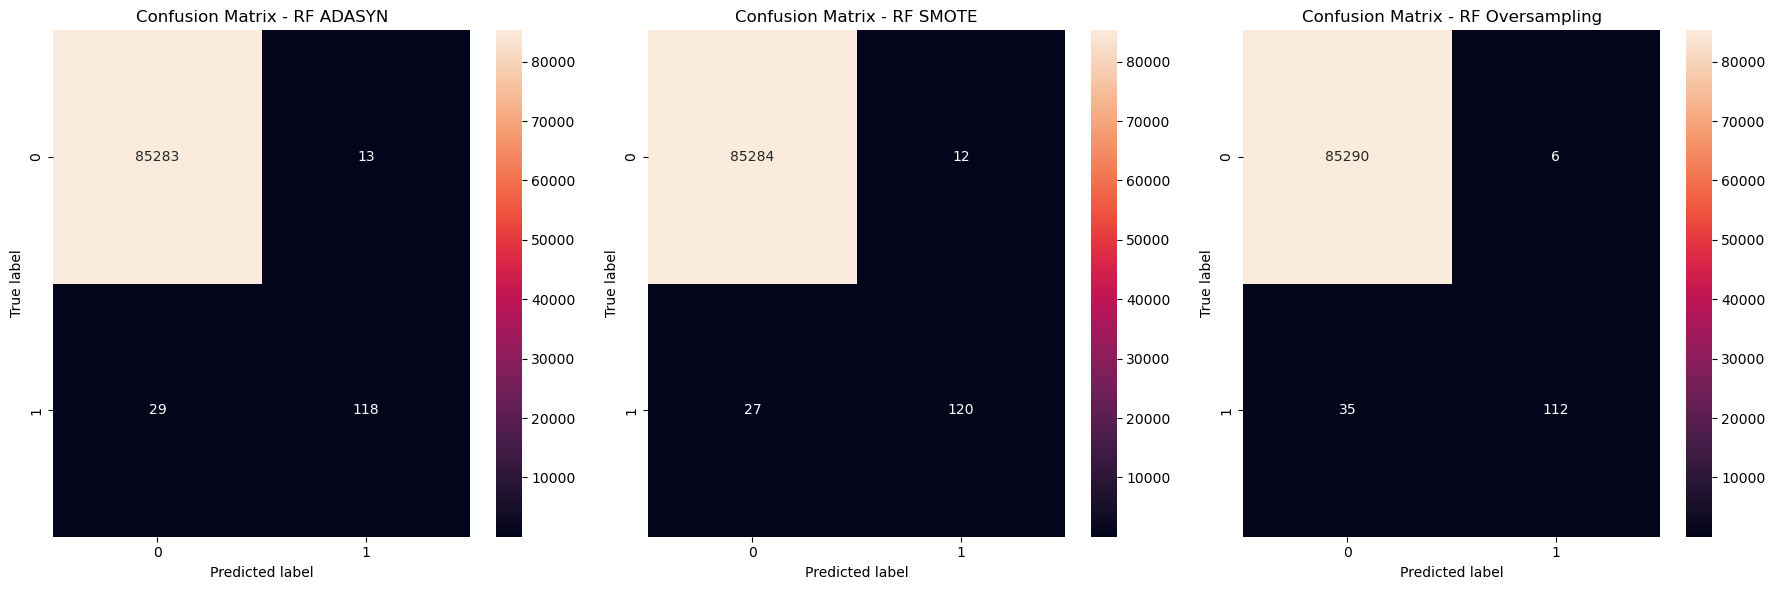

In [83]:
def plot_confusion_matrix(cm, model_name, ax):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title('Confusion Matrix - {}'.format(model_name))
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

# Confusion matrices
confusion_matrix_adasyn = performance_dict['RF ADASYN']['Confusion_matrix']
confusion_matrix_smote = performance_dict['RF SMOTE']['Confusion_matrix']
confusion_matrix_oversampling = performance_dict['RF Oversampling']['Confusion_matrix']

# Plot confusion matrices in subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_confusion_matrix(confusion_matrix_adasyn, 'RF ADASYN', axes[0])
plot_confusion_matrix(confusion_matrix_smote, 'RF SMOTE', axes[1])
plot_confusion_matrix(confusion_matrix_oversampling, 'RF Oversampling', axes[2])

plt.tight_layout()
plt.show()

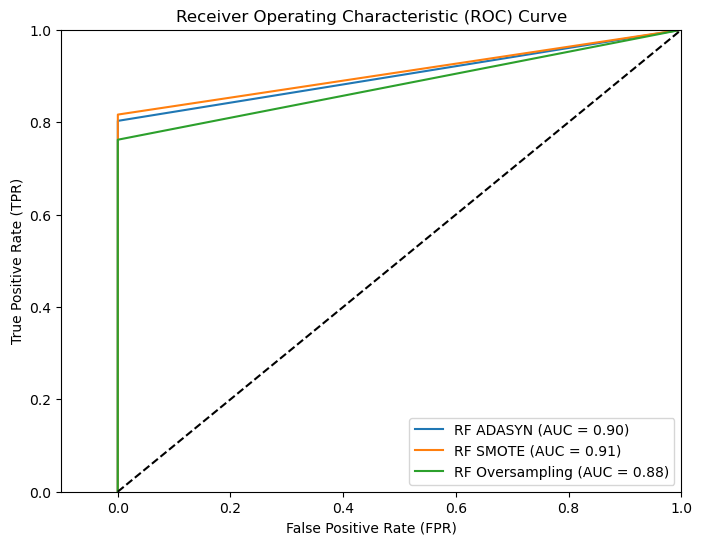

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate probabilities of positive class
probs_adasyn = performance_dict['RF ADASYN']['probs_test']
probs_smote = performance_dict['RF SMOTE']['probs_test']
probs_oversampling = performance_dict['RF Oversampling']['probs_test']

# Calculate FPR and TPR from probabilities and true labels
fpr_adasyn, tpr_adasyn, _ = roc_curve(y_test, probs_adasyn)
fpr_smote, tpr_smote, _ = roc_curve(y_test, probs_smote)
fpr_oversampling, tpr_oversampling, _ = roc_curve(y_test, probs_oversampling)

# Get AUC values from the dictionary
auc_adasyn = performance_dict['RF ADASYN']['AUC_test']
auc_smote = performance_dict['RF SMOTE']['AUC_test']
auc_oversampling = performance_dict['RF Oversampling']['AUC_test']

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_adasyn, tpr_adasyn, label='RF ADASYN (AUC = {:.2f})'.format(auc_adasyn))
plt.plot(fpr_smote, tpr_smote, label='RF SMOTE (AUC = {:.2f})'.format(auc_smote))
plt.plot(fpr_oversampling, tpr_oversampling, label='RF Oversampling (AUC = {:.2f})'.format(auc_oversampling))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC graph above shows that the Random Forest model with SMOTE technique has a high AUC score, indicating good performance in distinguishing between fraudulent and non-fraudulent transactions. As we move along the curve towards the right, the model captures more true positives (fraudulent transactions correctly identified), but at the same time, it also classifies more normal transactions as fraudulent, resulting in false positives.

Considering the trade-off between capturing more fraudulent transactions and increasing false positives, the Random Forest model with SMOTE technique outperforms other models. It achieves the highest F1 score of 86% on the test datasets, which is a measure that balances precision and recall. This indicates that the model can effectively identify fraudulent transactions while minimizing the misclassification of normal transactions. Therefore, the Random Forest model with SMOTE technique is chosen as the final model for this task.

# Thank You